In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv("C:/Users/Swathi/Desktop/Excelr Classes/Assignments/5.Logistic Regression/creditcard.csv")
df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [3]:
#droping columns with index number

df1=df.drop([df.columns[0],df.columns[10]],axis=1)
df1.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,1,5


In [4]:
df1 = pd.get_dummies(data=df1,columns=['owner','selfemp'])
df1.head()

,card,reports,age,income,share,expenditure,dependents,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes
0,yes,0,37.66667,4.5200,0.033270,124.983300,3,1,12,0,1,1,0
1,yes,0,33.25000,2.4200,0.005217,9.854167,3,1,13,1,0,1,0
2,yes,0,33.66667,4.5000,0.004156,15.000000,4,1,5,0,1,1,0
3,yes,0,30.50000,2.5400,0.065214,137.869200,0,1,7,1,0,1,0
4,yes,0,32.16667,9.7867,0.067051,546.503300,2,1,5,0,1,1,0


In [5]:
df1['card'] = df1.card.map({'no':0,'yes':1})
df1.head()

,card,reports,age,income,share,expenditure,dependents,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes
0,1,0,37.66667,4.5200,0.033270,124.983300,3,1,12,0,1,1,0
1,1,0,33.25000,2.4200,0.005217,9.854167,3,1,13,1,0,1,0
2,1,0,33.66667,4.5000,0.004156,15.000000,4,1,5,0,1,1,0
3,1,0,30.50000,2.5400,0.065214,137.869200,0,1,7,1,0,1,0
4,1,0,32.16667,9.7867,0.067051,546.503300,2,1,5,0,1,1,0


In [6]:
df1.iloc[:,:].isnull().values.any()

False

In [7]:
def norm_func(i):
    z=(i-i.min())/(i.max()-i.min())
    return(z)
df_norm = norm_func(df1.iloc[:,:])
df_norm.head()

,card,reports,age,income,share,expenditure,dependents,majorcards,active,owner_no,owner_yes,selfemp_no,selfemp_yes
0,1.0,0.0,0.450,0.324304,0.036593,0.040324,0.500000,1.0,0.260870,0.0,1.0,1.0,0.0
1,1.0,0.0,0.397,0.166290,0.005636,0.003179,0.500000,1.0,0.282609,1.0,0.0,1.0,0.0
2,1.0,0.0,0.402,0.322799,0.004465,0.004839,0.666667,1.0,0.108696,0.0,1.0,1.0,0.0
3,1.0,0.0,0.364,0.175320,0.071843,0.044481,0.000000,1.0,0.152174,1.0,0.0,1.0,0.0
4,1.0,0.0,0.384,0.720594,0.073870,0.176320,0.333333,1.0,0.108696,0.0,1.0,1.0,0.0


In [8]:
from sklearn.linear_model import LogisticRegression

x=df_norm.iloc[:,1:]
y=df_norm.iloc[:,0]

classifer = LogisticRegression()
classifer.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# **********Confusion Matrix ****************

In [10]:
#Score
classifer.score(x,y)
print("Model score : ",classifer.score(x,y))

###Confusion matrix with sklearn

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
confusion_matrix(classifer.predict(x),y)

print("confusion matrix :  ""\n",confusion_matrix(classifer.predict(x),y))

Model score :  0.8559514783927218
confusion matrix :  
 [[ 110    4]
 [ 186 1019]]


In [11]:
# ***** Precision & Recall, Fscore*****

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y,classifer.predict(x)))

              precision    recall  f1-score   support

         0.0       0.96      0.37      0.54       296
         1.0       0.85      1.00      0.91      1023

    accuracy                           0.86      1319
   macro avg       0.91      0.68      0.73      1319
weighted avg       0.87      0.86      0.83      1319



In [13]:
# ***** ROC CURVE*****

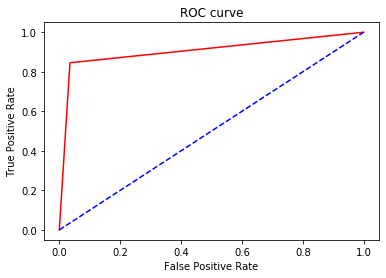

In [14]:
##Computing false and true positive rates
FalsePositiveRate, TruePositiveRate,_=roc_curve(classifer.predict(x),y,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()

##Adding the ROC
plt.plot(FalsePositiveRate, TruePositiveRate, color='red',label='ROC curve')

##Random FalsePositiveRate and TruePositiveRate
plt.plot([0, 1], [0, 1], color='blue',linestyle='--')

##Title and label
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [15]:
# predicted value to our original data frame

card_pred =classifer.predict(x)

df['card_predicted']= card_pred

df['card_predicted'] = df.card_predicted.map({0:'no',1:'yes'})

df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card_predicted
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,yes
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,yes
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,yes
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,yes
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,yes


In [16]:
#Probablity Value
card_prob = pd.DataFrame(classifer.predict_proba(x.iloc[:,:]))
card_prob.head()

,0,1
0,0.129129,0.870871
1,0.323782,0.676218
2,0.253760,0.746240
3,0.154173,0.845827
4,0.036383,0.963617


In [17]:
# concat card_prob to our data frame

df=pd.concat([df,card_prob],axis=1)
df.head()

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card_predicted,0,1
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,yes,0.129129,0.870871
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,yes,0.323782,0.676218
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,yes,0.253760,0.746240
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,yes,0.154173,0.845827
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,yes,0.036383,0.963617


In [18]:
df.to_csv("Card Application Prediction.csv")